In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
base_data = pd.read_excel("/content/microdados_ed_basica_2023_NE.xlsx")

def calcular_percent(presence):
    total = presence.sum()
    return (presence / total * 100).round(2)

local_presence = base_data['TP_LOCALIZACAO'].value_counts()
local_percent = calcular_percent(local_presence)


result = pd.concat([local_presence, local_percent], axis=1, keys=['Quantidade', 'Percentual (%)'])
result.reset_index(inplace=True)
result.rename(columns={'TP_LOCALIZACAO': 'Localização'}, inplace=True)

def converter_local(valor):
    if valor == 1:
        return 'Urbana'
    elif valor == 2:
        return 'Rural'
    else:
        return 'Valor inválido'

result['Localização'] = result['Localização'].apply(converter_local)

print("Localização das Escolas Pernambucanas")
print("")
print(result)

Localização das Escolas Pernambucanas

  Localização  Quantidade  Percentual (%)
0      Urbana        6286           61.51
1       Rural        3933           38.49


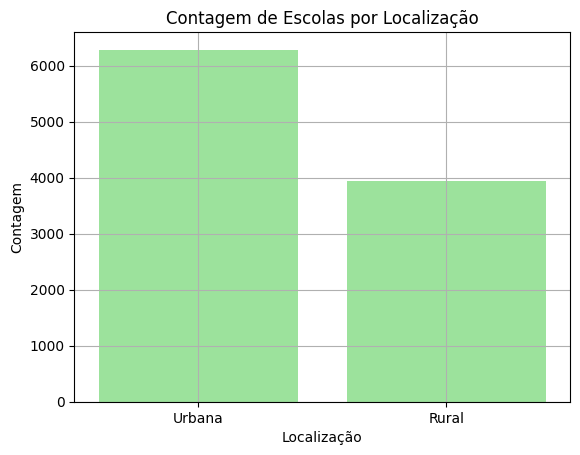

In [83]:
plot = sns.countplot(x='TP_LOCALIZACAO', data=base_data, color='lightgreen')

plot.set_xticks(range(len(plot.get_xticks())))
plot.set_xticklabels(['Urbana', 'Rural'])

plt.title('Contagem de Escolas por Localização')
plt.xlabel('Localização')
plt.grid(True)
plt.ylabel('Contagem')

plt.show()


In [89]:
water_presence = base_data['IN_AGUA_POTAVEL'].value_counts()
water_percent = calcular_percent(water_presence)


result = pd.concat([water_presence, water_percent], axis=1, keys=['Quantidade', 'Percentual (%)'])
result.reset_index(inplace=True)
result.rename(columns={'IN_AGUA_POTAVEL': 'Água Potável'}, inplace=True)

def converter_water(valor):
    if valor == 0:
        return 'Não'
    elif valor == 1:
        return 'Sim'
    else:
        return 'Valor inválido'

result['Água Potável'] = result['Água Potável'].apply(converter_water)

print("Água Potável das Escolas Pernambucanas")
print("")
print(result)

Água Potável das Escolas Pernambucanas

  Água Potável  Quantidade  Percentual (%)
0          Sim        7772           96.96
1          Não         244            3.04


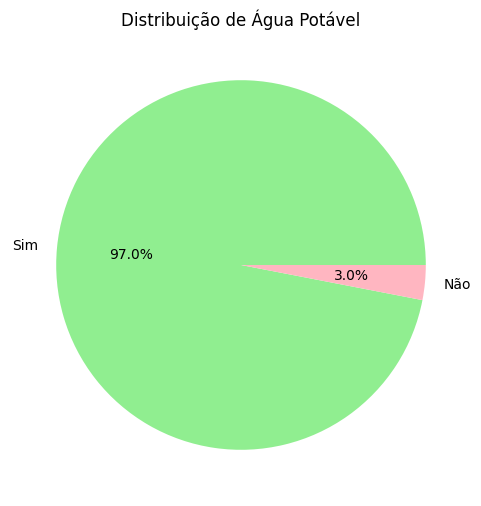

In [90]:
local_count = base_data['IN_AGUA_POTAVEL'].value_counts()

plt.figure(figsize=(6, 6))
plot = plt.pie(local_count, labels=['Sim', 'Não'], autopct='%1.1f%%', colors=['lightgreen', 'lightpink'])

plt.title('Distribuição de Água Potável')

plt.show()

In [96]:
energy_presence = base_data['IN_ENERGIA_REDE_PUBLICA'].value_counts()
energy_percent = calcular_percent(energy_presence)


result = pd.concat([energy_presence, energy_percent], axis=1, keys=['Quantidade', 'Percentual (%)'])
result.reset_index(inplace=True)
result.rename(columns={'IN_ENERGIA_REDE_PUBLICA': 'Energia'}, inplace=True)

def converter_energy(valor):
    if valor == 0:
        return 'Não'
    elif valor == 1:
        return 'Sim'
    else:
        return 'Valor inválido'

result['Energia'] = result['Energia'].apply(converter_energy)

print("Energia de Rede Pública nas Escolas Pernambucanas")
print("")
print(result)

Energia de Rede Pública nas Escolas Pernambucas

  Energia  Quantidade  Percentual (%)
0     Sim        7952            99.2
1     Não          64             0.8


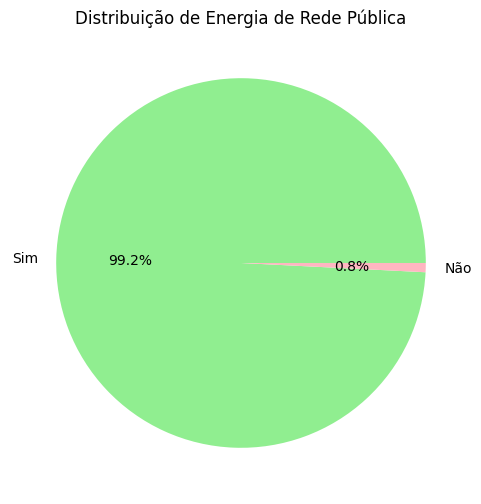

In [94]:
local_count = base_data['IN_ENERGIA_REDE_PUBLICA'].value_counts()

plt.figure(figsize=(6, 6))
plot = plt.pie(local_count, labels=['Sim', 'Não'], autopct='%1.1f%%', colors=['lightgreen', 'lightpink'])

plt.title('Distribuição de Energia de Rede Pública')

plt.show()

In [100]:
trash_presence = base_data['IN_LIXO_SERVICO_COLETA'].value_counts()
trash_percent = calcular_percent(trash_presence)


result = pd.concat([trash_presence, trash_percent], axis=1, keys=['Quantidade', 'Percentual (%)'])
result.reset_index(inplace=True)
result.rename(columns={'IN_LIXO_SERVICO_COLETA': 'Coleta de Lixo'}, inplace=True)

def converter_trash(valor):
    if valor == 0:
        return 'Não'
    elif valor == 1:
        return 'Sim'
    else:
        return 'Valor inválido'

result['Coleta de Lixo'] = result['Coleta de Lixo'].apply(converter_trash)

print("Coleta de Lixo das Escolas Pernambucanas")
print("")
print(result)

Coleta de Lixo das Escolas Pernambucas

  Coleta de Lixo  Quantidade  Percentual (%)
0            Sim        6393           79.75
1            Não        1623           20.25


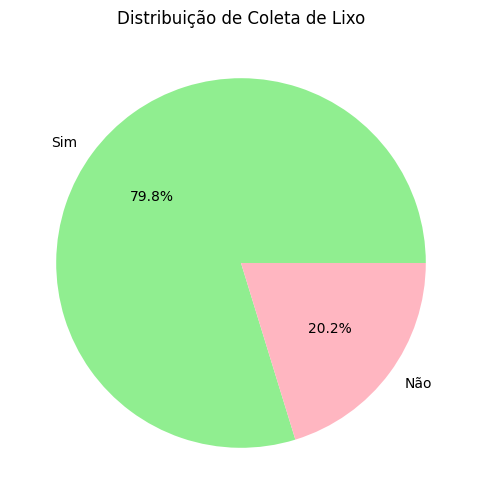

In [137]:
local_count = base_data['IN_LIXO_SERVICO_COLETA'].value_counts()

plt.figure(figsize=(6, 6))
plot = plt.pie(local_count, labels=['Sim', 'Não'], autopct='%1.1f%%', colors=['lightgreen', 'lightpink'])

plt.title('Distribuição de Coleta de Lixo')

plt.show()

In [110]:
regiao_esgoto = base_data.groupby(['NO_REGIAO_GEOG_INTERM','IN_ESGOTO_REDE_PUBLICA']).size()

reg_esg_percent = calcular_percent(regiao_esgoto)

def converter_esgoto(valor):
    if valor == 0:
        return 'Não'
    elif valor == 1:
        return 'Sim'
    else:
      return 'Sem informação'

result = pd.concat([regiao_esgoto, reg_esg_percent], axis=1, keys=['PRESENÇA', 'PERCENTUAL (%)'])
result.reset_index(inplace=True)
result.rename(columns={'IN_ESGOTO_REDE_PUBLICA':'Esgoto Rede Pública'}, inplace=True)

result['Esgoto Rede Pública'] = result['Esgoto Rede Pública'].apply(converter_esgoto)

print("Contagem de Redes de Esgotos Pública por Região Pernambucana")
print("")
print(result)

Contagem de Redes de Esgotos Pública por Região Pernambucana

  NO_REGIAO_GEOG_INTERM Esgoto Rede Pública  PRESENÇA  PERCENTUAL (%)
0               Caruaru                 Não      1037           12.94
1               Caruaru                 Sim      1085           13.54
2             Petrolina                 Não       508            6.34
3             Petrolina                 Sim       535            6.67
4                Recife                 Não      1669           20.82
5                Recife                 Sim      2515           31.37
6         Serra Talhada                 Não       397            4.95
7         Serra Talhada                 Sim       270            3.37


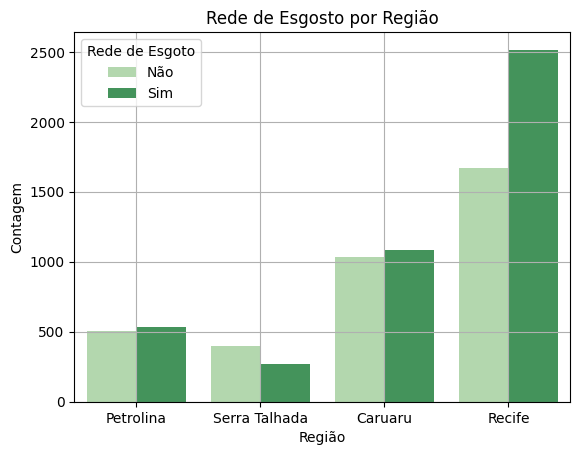

In [133]:
plot = sns.countplot(x='NO_REGIAO_GEOG_INTERM', hue='IN_ESGOTO_REDE_PUBLICA', data=base_data, palette='Greens')
plot.legend(title='Rede de Esgoto', labels=['Não', 'Sim'])

plt.title('Rede de Esgosto por Região')
plt.xlabel('Região')
plt.ylabel('Contagem')
plt.grid(True)

plt.show()